In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stop_common=set(stopwords.words('english'))
import matplotlib.pyplot as plt
import requests
import random 
from collections import OrderedDict
import bs4
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from tqdm import tqdm_notebook
import time
from time import sleep
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,  mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [8]:
ds_salaries = pd.read_csv('/content/North_America_data_scientist.csv')

In [9]:
ds_salaries.head()

,location,title,company,salary,summary
0,"Hamilton, ON",Data Scientist (junior or intermediate),Preteckt,90000.0,You’ll have access to a huge set (over 250 mil...
1,"Burnaby, BC",Machine Learning Engineer (Wireless),Bluvec Technoligies Inc.,95000.0,"With core designers from Microsoft, Viavi, For..."
2,"Kitchener, ON",Junior Data Scientist/Data Engineer,Acerta Analytics Solutions Inc,70000.0,Assist with data feasibility and similar data ...
3,"Toronto, ON",Data Scientist / Machine Learning Engineer,Leadbright Inc.,67500.0,Create and visualize data using our charting t...
4,"Toronto, ON",Data Scientist/Analyst 120,Foilcon,192000.0,Strong business and data analysis skills.Exper...


In [10]:
round(ds_salaries.salary.describe(),2)

count        93.00
mean     134428.20
std       55209.15
min       30480.00
25%       91244.00
50%      127000.00
75%      164592.00
max      289560.00
Name: salary, dtype: float64

In [11]:
ds_median_salary = np.median(ds_salaries.salary)

In [12]:
ds_salaries['high_salary'] = [1 if i > ds_median_salary else 0 for i in ds_salaries.salary]

In [13]:
ds_salaries.head()
print(len(ds_salaries))

def clean_data(data, stop_common):
    stop_common = set.union(stop_common, {'will', 'na', 'tools', 'software','full time',
                                          'skills','using', 'system', 'year', 'building', 'new',
                                         "build", "years", "scientist", "developer", "developers",
                                         "work", "knowledge", "full", "time", "provide", "looking",
                                         "role", "development", "engineer", "engineering", "including",
                                         "engineers", "working", "data", "scientists", "large", "use", "etc",
                                          "similar", "one"})
    data = data.lower() #transfer to lower case
    data = data.replace("'s", "") #remove 's
    data = re.sub(r'[^\w]', ' ', data) #remove all symbol
    data = filter(lambda w: not w in stop_common,data.split(" "))#split the sentence and remove the stop words
    data = list(filter(("").__ne__, data)) #remove blank element
    
    return data

93


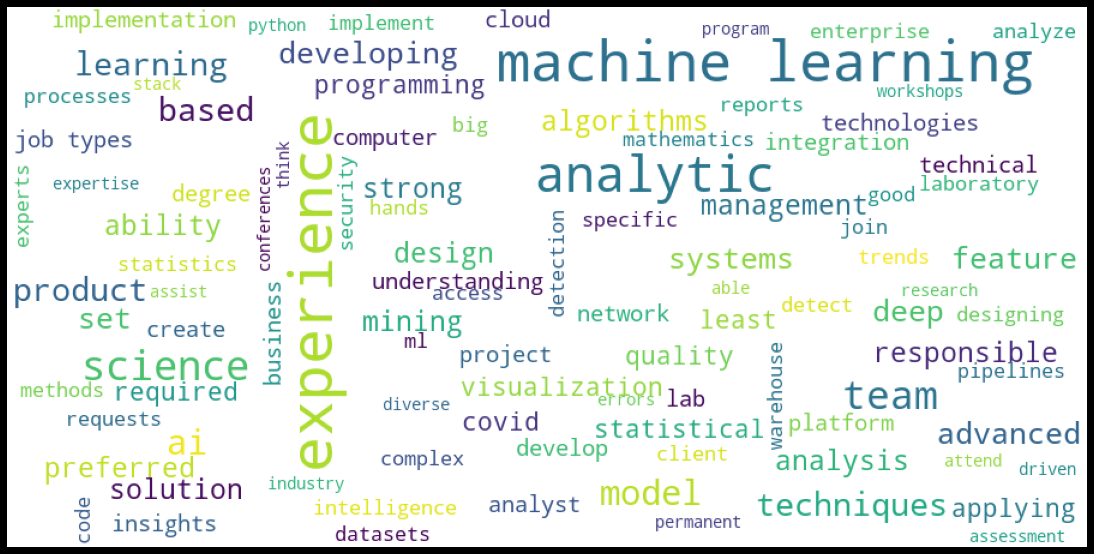

In [14]:
result = []
for i in range(ds_salaries.shape[0]):
    result+=clean_data(ds_salaries.iloc[i]["summary"], stop_common)
wordcloud = WordCloud(max_font_size=50, max_words=100, width=900, height=450, background_color="white").generate(",".join(result))
wordcloud.to_file("Data_Scientist.png")
plt.figure( figsize=(15,7.5), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
import plotly.graph_objs as go
from plotly.offline import iplot

trace1 = go.Histogram(x = ds_salaries.salary,
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    )

data = [trace1]
layout = dict(title = 'Salary Variation for Data Scientists',
              xaxis= dict(title= 'Salary Variation',ticklen= 5,zeroline= False),
              autosize=False,
    width=400,
    height=400,
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=100,
        t=100,
        pad = 4
             ))
fig = dict(data = data, layout = layout)

iplot(fig)

In [26]:
trace1 = go.Scatter(y = ds_salaries.salary,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(200, 112, 2, 0.8)'),
                    )

data = [trace1]
layout = dict(title = 'Salary Variation for Data Scientists',
              xaxis= dict(title= 'Salary Variation',ticklen= 5,zeroline= False),
              autosize=False,
    width=400,
    height=400,
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=100,
        t=100,
        pad = 4
             ))
fig = dict(data = data, layout = layout)

iplot(fig)

#### Only Location

In [16]:
ds_salaries.location.value_counts()

New York, NY                              8
Toronto, ON                               6
Long Island City, NY 11101                4
Washington, DC                            3
Herndon, VA 20170                         3
                                         ..
San Ramon, CA 94583                       1
Redwood City, CA 94063 (Downtown area)    1
San Francisco, CA                         1
Torrance, CA 90502                        1
Houston, TX 77079 (Memorial area)         1
Name: location, Length: 64, dtype: int64

In [17]:
cities = []
states = []

for loc in ds_salaries.location:
    items = loc.split(',')
    cities.append(items[0])
    states.append(items[1])


In [18]:
only_states = []
for state in states:
    only_states.append(re.search(r'\w+', state).group(0))
print(len(only_states))

93


In [19]:
ds_salaries['city'] = cities
ds_salaries['state'] = only_states

In [20]:
ds_salaries.city = ds_salaries.city + ", " + ds_salaries.state

In [21]:
for i in ds_salaries.state:
    if len(i) > 2:
        print(i)

In [ ]:
ds_salaries

,location,title,company,salary,summary,high_salary,city,state
0,"Hamilton, ON",Data Scientist (junior or intermediate),Preteckt,90000.000,You’ll have access to a huge set (over 250 mil...,0,"Hamilton, ON",ON
1,"Burnaby, BC",Machine Learning Engineer (Wireless),Bluvec Technoligies Inc.,95000.000,"With core designers from Microsoft, Viavi, For...",0,"Burnaby, BC",BC
2,"Kitchener, ON",Junior Data Scientist/Data Engineer,Acerta Analytics Solutions Inc,70000.000,Assist with data feasibility and similar data ...,0,"Kitchener, ON",ON
3,"Toronto, ON",Data Scientist / Machine Learning Engineer,Leadbright Inc.,67500.000,Create and visualize data using our charting t...,0,"Toronto, ON",ON
4,"Toronto, ON",Data Scientist/Analyst 120,Foilcon,192000.000,Strong business and data analysis skills.Exper...,1,"Toronto, ON",ON
...,...,...,...,...,...,...,...,...
88,"Missouri City, MO",Jr. Data Scientist,Dash Technologies Inc,114953.415,Work with developers to design algorithms and ...,0,"Missouri City, MO",MO
89,"Columbus, OH",Machine Learning Architect,Digital Dhara,289560.000,The ML Ops Architect will work with data scien...,1,"Columbus, OH",OH
90,"Portland, OR 97202 (Hosford-Abernethy area)",Data Analyst/Data Scientist,Cascade Data Labs,117475.000,Analyze a collection of raw data sets to creat...,0,"Portland, OR",OR
91,"Portland, OR 97202 (Hosford-Abernethy area)",Data Analyst/Data Scientist,Cascade Data Labs,117475.000,Cascade Data Labs is a boutique consulting age...,0,"Portland, OR",OR


In [ ]:
ds_salaries.city.nunique()

53

In [ ]:
ds_salaries.city.value_counts()

New York, NY            8
Washington, DC          6
Toronto, ON             6
Arlington, VA           4
Long Island City, NY    4
Montréal, QC            3
Calgary, AB             3
San Francisco, CA       3
Herndon, VA             3
Dallas, TX              2
Portland, OR            2
Cambridge, MA           2
Ottawa, ON              2
Vancouver, BC           2
Los Angeles, CA         2
Irving, TX              2
Rockville, MD           2
Houston, TX             2
Torrance, CA            1
Bethesda, MD            1
Pittsburgh, PA          1
Hamilton, ON            1
Pleasanton, CA          1
Burnaby, BC             1
Kitchener, ON           1
Fort Lauderdale, FL     1
Bellevue, WA            1
Foster City, CA         1
North York, ON          1
Gaithersburg, MD        1
Brooklyn, NY            1
Richardson, TX          1
Alexandria, VA          1
West Menlo Park, CA     1
San Ramon, CA           1
Miami, FL               1
Santa Clara, CA         1
Alpharetta, GA          1
Nashville, T

In [ ]:
city_dummies = pd.get_dummies(ds_salaries.city)

X_city = city_dummies
y_city = ds_salaries.high_salary

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.33, random_state=90)

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print ("Accuracy Score:", acc.round(4))
print(rfc_pred)

s = cross_val_score(rfc, X_city, y_city, cv=3, n_jobs=-1)
print ("Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.7097
[0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
Cross Validation Score:	0.505 ± 0.08


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_city.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in X_city.columns:
    feature_medians.append(np.median(ds_salaries[ds_salaries.city == i].salary))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > ds_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance,median_salary,over_or_under
31,"New York, NY",0.114977,165100.0000,1
51,"Washington, DC",0.070424,152400.0000,1
28,"Montréal, QC",0.057847,91244.0000,0
43,"San Francisco, CA",0.054163,185928.0000,1
39,"Portland, OR",0.041505,117475.0000,0
35,"Ottawa, ON",0.040172,88692.2500,0
2,"Arlington, VA",0.026141,117475.0000,0
47,"Toronto, ON",0.025741,100000.0000,0
23,"Long Island City, NY",0.024653,122020.0125,0
14,"Fort Lauderdale, FL",0.022417,88900.0000,0


#### Only summary

In [ ]:
ds_salaries_w_desc = ds_salaries[ds_salaries.summary.notnull()]

X_summ = ds_salaries_w_desc.summary
y_summ = ds_salaries_w_desc.high_salary

In [ ]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_summ)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
len(cv.get_feature_names())

653

In [ ]:
X_summ_trans = pd.DataFrame(cv.transform(X_summ).todense(), columns=cv.get_feature_names())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.asmatrix(X_summ_trans), y_summ, test_size=0.33,
                                                    random_state=59, stratify=y_summ)

In [ ]:
word_counts = X_summ_trans.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

data           129
learning        34
experience      29
machine         26
analytics       20
years           19
science         13
including       10
development      9
ai               9
work             9
team             9
using            9
techniques       8
based            8
scientists       8
engineers        8
tools            7
developing       7
models           7
dtype: int64

In [ ]:
word_counts.to_csv('ds-indeed-words.csv', encoding='utf-8')

In [ ]:
rfc = RandomForestClassifier(500, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_summ_trans.values, y_summ.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.452
Cross Validation Score: 0.418 ± 0.142


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_summ_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_summ_trans.columns:
    feature_medians.append(np.median(ds_salaries_w_desc[ds_salaries_w_desc.summary.str.lower().str.contains(i)].salary))
    feature_means.append(round(np.mean(ds_salaries_w_desc[ds_salaries_w_desc.summary.str.lower().str.contains(i)].salary),2))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > ds_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,mean_salary,over_or_under
234,experience,0.020049,144462.5000,138592.36,1
164,data,0.012883,122243.8500,133559.93,0
193,developing,0.010631,95250.0000,125016.43,0
356,learning,0.009636,136525.0000,143178.68,1
399,models,0.009585,159385.0000,169564.05,1
595,technical,0.009119,147637.5000,155225.75,1
75,based,0.008890,144462.5000,136893.49,1
652,years,0.008662,135500.0000,132875.00,1
593,team,0.008344,109543.8500,124280.75,0
624,understanding,0.008311,192024.0000,166354.80,1


#### Only title

In [ ]:
ds_salaries_w_desc = ds_salaries[ds_salaries.summary.notnull()]

X_title = ds_salaries_w_desc.title
y_title = ds_salaries_w_desc.high_salary

In [ ]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_title)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
X_title_trans = pd.DataFrame(cv.transform(X_title).todense(), columns=cv.get_feature_names())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_title_trans, y_title, test_size=0.33, random_state=90)

In [ ]:
rfc = RandomForestClassifier(500, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_title_trans.values, y_title.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.516
Cross Validation Score: 0.407 ± 0.128


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_title_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_title_trans.columns:
    feature_medians.append(np.median(ds_salaries_w_desc[ds_salaries_w_desc.title.str.lower().str.contains(i)].salary))
    feature_means.append(round(np.mean(ds_salaries_w_desc[ds_salaries_w_desc.title.str.lower().str.contains(i)].salary),2))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > ds_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,mean_salary,over_or_under
27,data,0.065955,127000.0000,138420.73,0
81,senior,0.057241,133350.0000,143530.13,1
45,junior,0.052787,88900.0000,92960.00,0
16,business,0.045025,88900.0000,98408.33,0
86,statistician,0.041884,51904.9000,53384.45,0
37,engineer,0.040703,127006.3500,137713.09,1
7,analyst,0.039987,123097.6075,135809.78,0
77,scientist,0.033108,117475.0000,129300.27,0
10,architect,0.032589,180975.0000,203358.75,1
5,ai,0.023980,144000.0000,148877.71,1


#### Combining Title CV, Summary CV, and Location

In [ ]:
ds_salaries_w_desc = ds_salaries_w_desc[ds_salaries_w_desc.summary.notnull()].reset_index()
city_dummies = pd.get_dummies(ds_salaries_w_desc.city)

X = pd.concat([city_dummies, X_title_trans, X_summ_trans], axis=1)
y = ds_salaries_w_desc.high_salary


In [ ]:
print(X_summ_trans.iloc[0].value_counts())

0    636
1     17
Name: 0, dtype: int64


In [ ]:
print(X.shape)
print(y.shape)

(93, 805)
(93,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.35, random_state=90, stratify=y)

In [ ]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_estimate = model.predict(X_test)

print("Residual sum of squares: %.2f" % np.mean((y_estimate - y_test) ** 2))

Residual sum of squares: 0.30


In [ ]:
# model = linear_model.LinearRegression()
# model.fit(X_train, y_train)
# print(model.score(X_test, y_test))
# # ## test
# # predicted = model.predict(X_test)
# # print(predicted)
# # print(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(1000, random_state=90)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X.values, y.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3}".format(s.mean().round(3)))

Accuracy Score: 0.545
Cross Validation Score: 0.571


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in city_dummies.columns:
    feature_medians.append(np.median(ds_salaries[ds_salaries.city == i].salary))
for i in X_title_trans.columns:
    feature_medians.append(np.median(ds_salaries_w_desc[ds_salaries_w_desc.title.str.lower().str.contains(i)].salary))
for i in X_summ_trans.columns:
    feature_medians.append(np.median(ds_salaries_w_desc[ds_salaries_w_desc.summary.str.lower().str.contains(i)].salary))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > ds_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,over_or_under
31,"New York, NY",0.033415,165100.00,1
316,data,0.010641,122243.85,0
134,senior,0.010580,133350.00,1
508,learning,0.010352,136525.00,1
43,"San Francisco, CA",0.010224,185928.00,1
287,computer,0.008915,157162.50,1
345,developing,0.008532,95250.00,0
564,new,0.008377,95250.00,0
386,experience,0.008340,144462.50,1
781,using,0.007942,157162.50,1


In [ ]:
# header1 = {'Connection': 'keep-alive', 'Upgrade-Insecure-Requests': '1', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Sec-Fetch-Site': 'same-origin', 'Sec-Fetch-Mode': 'navigate', 'Sec-Fetch-User': '?1', 'Sec-Fetch-Dest': 'document', 'Referer': 'https://www.google.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'en-US,en;q=0.9'}
# #IGNORE THIS BS
# header2 = {
#         "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
#         "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
#         "Accept-Language": "en-US,en;q=0.5",
#         "Referer": "https://www.google.com/",
#         "DNT": "1",
#         "Connection": "keep-alive",
#         "Upgrade-Insecure-Requests": "1"
#           }
#     # # Firefox 77 Windows
#     # {
#     #     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0",
#     #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
#     #     "Accept-Language": "en-US,en;q=0.5",
#     #     "Accept-Encoding": "gzip, deflate, br",
#     #     "Referer": "https://www.google.com/",
#     #     "DNT": "1",
#     #     "Connection": "keep-alive",
#     #     "Upgrade-Insecure-Requests": "1"
#     # },
#     # # Chrome 83 Mac
#     # {
#     #     "Connection": "keep-alive",
#     #     "DNT": "1",
#     #     "Upgrade-Insecure-Requests": "1",
#     #     "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
#     #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
#     #     "Sec-Fetch-Site": "none",
#     #     "Sec-Fetch-Mode": "navigate",
#     #     "Sec-Fetch-Dest": "document",
#     #     "Referer": "https://www.google.com/",
#     #     "Accept-Encoding": "gzip, deflate, br",
#     #     "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
#     # },
#     # # Chrome 83 Windows 
#     # {
#     #     "Connection": "keep-alive",
#     #     "Upgrade-Insecure-Requests": "1",
#     #     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
#     #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
#     #     "Sec-Fetch-Site": "same-origin",
#     #     "Sec-Fetch-Mode": "navigate",
#     #     "Sec-Fetch-User": "?1",
#     #     "Sec-Fetch-Dest": "document",
#     #     "Referer": "https://www.google.com/",
#     #     "Accept-Encoding": "gzip, deflate, br",
#     #     "Accept-Language": "en-US,en;q=0.9"
#     # }

# ordered_headers_list = []
# for headers in headers_list:
#     h = OrderedDict()
#     for header,value in headers.items():
#         h[header]=value
#     ordered_headers_list.append(h)